## Feature Selection

## Forward Selection
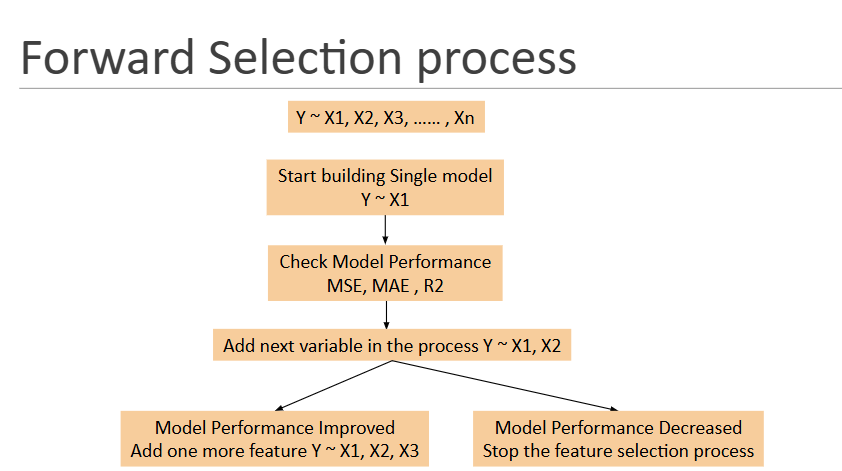

## Read the dataset

In [13]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Cars93.csv",
    na_values=["", "NA"],
    keep_default_na=False,
)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Perform basic data quality checks

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [15]:
df.shape

(93, 28)

In [16]:
df.isna().sum()

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y 
X => remaining features
Y => weight

In [18]:
X = df.drop(columns=["Weight", "id"])
Y = df[["Weight"]]

In [19]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [20]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Data Preprocessing and Data cleaning

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#### Separate categorical and continuous data

In [22]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [23]:
print(cat)

['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


In [24]:
print(con)

['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room']


In [26]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [27]:
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder())

In [28]:
pre = ColumnTransformer([("con", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [29]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Min.Price,con__Price,con__Max.Price,con__MPG.city,con__MPG.highway,con__EngineSize,con__Horsepower,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,...,con__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


## Feature Selection => Forward Selection

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [30]:
base_model = LinearRegression()
for_sel = SequentialFeatureSelector(
    base_model, direction="forward", n_features_to_select=10
)
for_sel.fit(X_pre, Y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=10)

In [32]:
imp_cols = for_sel.get_feature_names_out()
imp_cols

array(['con__MPG.highway', 'con__Horsepower', 'con__RPM',
       'con__Fuel.tank.capacity', 'con__Passengers', 'con__Wheelbase',
       'con__Width', 'con__Rear.seat.room', 'cat__Manufacturer',
       'cat__Origin'], dtype=object)

In [33]:
imp_cols[0]

'con__MPG.highway'

In [34]:
imp_cols[0].split("_")

['con', '', 'MPG.highway']

In [35]:
imp_cols[0].split("_")[-1]

'MPG.highway'

In [38]:
imp_features = []
for i in imp_cols:
    fea = i.split("_")[-1]
    imp_features.append(fea)

In [39]:
imp_features

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Wheelbase',
 'Width',
 'Rear.seat.room',
 'Manufacturer',
 'Origin']

In [42]:
X_sel = X[imp_features]
X_sel.head(2)

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Wheelbase,Width,Rear.seat.room,Manufacturer,Origin
0,31,140,6300,13.2,5,102,68,26.5,Acura,non-USA
1,25,200,5500,18.0,5,115,71,30.0,Acura,non-USA


## Data Preprocessing - 2nd stage

In [54]:
X_sel_cat = list(X_sel.columns[X_sel.dtypes == "object"])
X_sel_con = list(X_sel.columns[X_sel.dtypes != "object"])

In [55]:
cat_sel_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [56]:
con_sel_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [57]:
pre_sel = ColumnTransformer(
    [("con", con_sel_pipe, X_sel_con), ("cat", cat_sel_pipe, X_sel_cat)]
).set_output(transform="pandas")

In [58]:
pre_sel

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers',
                                  'Wheelbase', 'Width', 'Rear.seat.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Origin'])])

In [59]:
X_sel_pre = pre_sel.fit_transform(X_sel)
X_sel_pre.head(2)

,con__MPG.highway,con__Horsepower,con__RPM,con__Fuel.tank.capacity,con__Passengers,con__Wheelbase,con__Width,con__Rear.seat.room,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__Manufacturer_Pontiac,cat__Manufacturer_Saab,cat__Manufacturer_Saturn,cat__Manufacturer_Subaru,cat__Manufacturer_Suzuki,cat__Manufacturer_Toyota,cat__Manufacturer_Volkswagen,cat__Manufacturer_Volvo,cat__Origin_USA,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.286932,-0.366184,-0.449727,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,1.629649,0.431983,0.740403,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Test split

In [60]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_sel_pre, Y, train_size=0.8, random_state=21
)

In [61]:
xtrain.shape

(74, 42)

In [62]:
xtest.shape

(19, 42)

In [63]:
xtrain.head()

,con__MPG.highway,con__Horsepower,con__RPM,con__Fuel.tank.capacity,con__Passengers,con__Wheelbase,con__Width,con__Rear.seat.room,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__Manufacturer_Pontiac,cat__Manufacturer_Saab,cat__Manufacturer_Saturn,cat__Manufacturer_Subaru,cat__Manufacturer_Suzuki,cat__Manufacturer_Toyota,cat__Manufacturer_Volkswagen,cat__Manufacturer_Volvo,cat__Origin_USA,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,0.155356,-0.632239,-0.619745,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.876650,-0.632239,0.060329,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.450214,0.165927,-0.109689,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.334791,1.230149,0.740403,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,1.924508,2.028316,1.250459,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
xtest.head()

,con__MPG.highway,con__Horsepower,con__RPM,con__Fuel.tank.capacity,con__Passengers,con__Wheelbase,con__Width,con__Rear.seat.room,cat__Manufacturer_Acura,cat__Manufacturer_Audi,...,cat__Manufacturer_Pontiac,cat__Manufacturer_Saab,cat__Manufacturer_Saturn,cat__Manufacturer_Subaru,cat__Manufacturer_Suzuki,cat__Manufacturer_Toyota,cat__Manufacturer_Volkswagen,cat__Manufacturer_Volvo,cat__Origin_USA,cat__Origin_non-USA
23,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-1.024079,-0.632239,-0.449727,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-1.336233,-0.111878,-0.472853,0.961306,1.852158,1.334791,0.431983,2.440589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.007926,-0.632239,0.570385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
21,-0.581941,0.060893,-0.809828,-0.203734,0.884457,0.892502,-0.100128,2.780626,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,-0.581941,0.502419,-1.820755,1.942392,0.884457,1.777079,2.028316,0.570385,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


## Build the model


In [66]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

## MOdel evaluation

In [67]:
model.score(xtrain, ytrain)

0.9824189691196679

In [68]:
model.score(xtest, ytest)

0.9256084511433593

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ypred_train = model.predict(xtrain)
mse = mean_squared_error(ytrain, ypred_train)
mae = mean_absolute_error(ytrain, ypred_train)
r2 = r2_score(ytrain, ypred_train)

print("Training Scores")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

Training Scores
MSE: 5913.750636634853
MAE: 53.41507609213931
R2: 0.9824189691196679


In [73]:
ypred_test = model.predict(xtest)
mse = mean_squared_error(ytest, ypred_test)
mae = mean_absolute_error(ytest, ypred_test)
r2 = r2_score(ytest, ypred_test)

print("Testing scores")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

Testing scores
MSE: 26981.588092453872
MAE: 138.2263786171038
R2: 0.9256084511433593


## This model is performing well in training as well in testing. We can this model for out of sample predictions